# **Machine Learning and Option Pricing**

 We investigate option pricing strategies by incorporating advanced machine-learning techniques. Given the complexity and dynamic nature of financial markets, especially options trading, traditional models like the Black-Scholes, while foundational, often fail to capture real-world intricacies. By leveraging machine learning, we can potentially achieve more accurate and robust option pricing; we study the ticker symbol **SPY**, an **S&P 500 ETF**. 

## 1. **Options**

An **option** is a financial contract that gives the holder the right, but not the obligation, to buy or sell an underlying asset (such as a stock, index, or commodity) at a predetermined price (called the **strike price**) before or on a specified expiration date. Options are commonly used in trading strategies for hedging, speculation, or income generation.

Options come in two main types:
- **Call Options**
- **Put Options**

Here’s a detailed breakdown of options:

### Call Option
   - **Definition**: A **call option** gives the holder the right to buy the underlying asset at the strike price before the option expires.
   - **Purpose**: Traders buy call options when they believe the price of the underlying asset will rise. The goal is to buy the asset at a lower price (strike price) and sell it at a higher market price.
   - **Example**: If you buy a call option for SPY (the S&P 500 ETF) with a strike price of 400, and SPY's price rises to 420, you can exercise the option to buy at 400 and make a profit of 20 per share (minus the cost of the option premium).

### Put Option
   - **Definition**: A **put option** gives the holder the right to sell the underlying asset at the strike price before the option expires.
   - **Purpose**: Traders buy put options when they believe the price of the underlying asset will fall. The goal is to sell the asset at a higher price (strike price) while the market price has decreased.
   - **Example**: If you buy a put option for SPY with a strike price of 400, and SPY's price falls to 380, you can exercise the option to sell at 400, making a profit of 20 per share (minus the cost of the option premium).



## 2. **Preparing the Python environment and imports**

<span style="font-size: 16px;">  We ensure that you have installed all the necessary libraries. These libraries will assist us in data retrieval, manipulation, and visualization.</span>

In [15]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### yfinance package


    
The `yfinance` package is a popular Python library used to retrieve historical market data from Yahoo Finance. It provides an easy-to-use interface to download stock and option prices, financial statements, and other financial data directly into Python for analysis, backtesting, or research purposes. The package is particularly useful for quantitative finance and data analysis tasks. We save all fetched data in a local drive.

### The ticker sympol **SPY**

The ticker symbol **SPY** represents the **SPDR S&P 500 ETF Trust**, which is an exchange-traded fund (ETF) that seeks to track the performance of the **S&P 500 Index**, a benchmark of the 500 largest publicly traded companies in the U.S. The ETF is managed by **State Street Global Advisors** (SSGA) and is one of the most popular and liquid ETFs in the world.

## 3. **Retrieving data and saving them locally** 

    
We will use the `yfinance` library to download options data for the ticker symbol **SPY**. We start by fetching the data for option calls for **SPY** for all expiration dates.


In [225]:
ticker_symbol = 'SPY'

# Initialize the yfinance Ticker object for SPY
ticker = yf.Ticker(ticker_symbol)

# Expiration dates
expirations = ticker.options

# Create an empty list to store all option calls data
options_calls_list = []
# Create an empty list to store all option pus data
#options_calls_puts = []


# Loop through each expiration date to fetch options data
for exp in expirations:
    options = ticker.option_chain(exp)
    calls = options.calls
    #puts = options.puts 
    
    # Add expiration date to each DataFrame of calls and puts
    calls['expirationDateCalls'] = exp
    #puts['expirationDate_puts'] = exp

    # Append to the all_options DataFrame
    options_calls_list.append(calls)
    #options_puts_list.append(puts)


# Concatenate all DataFrames in the list
all_options_calls = pd.concat(options_calls_list, ignore_index=True)

# Save the options data to a CSV file
all_options_calls.to_csv('spy_options_calls_data.csv', index=False)


## 4. **Understanding the Data**


To have a DataFrame of fixed data, we create the CSV file on the Disk 'spy_options_calls_data_Nov23.csv'. This file is no longer affected by real-time data, and for the rest of this project, we work with this file.  

In [438]:
spy_options_calls = pd.read_csv('spy_options_calls_data_Nov23.csv')


spy_options_calls.info()
spy_options_calls.describe()
spy_options_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   contractSymbol       3705 non-null   object 
 1   lastTradeDate        3705 non-null   object 
 2   strike               3705 non-null   float64
 3   lastPrice            3705 non-null   float64
 4   bid                  3702 non-null   float64
 5   ask                  3705 non-null   float64
 6   change               3705 non-null   float64
 7   percentChange        3705 non-null   float64
 8   volume               3577 non-null   float64
 9   openInterest         3701 non-null   float64
 10  impliedVolatility    3705 non-null   float64
 11  inTheMoney           3705 non-null   bool   
 12  contractSize         3705 non-null   object 
 13  currency             3705 non-null   object 
 14  expirationDateCalls  3705 non-null   object 
dtypes: bool(1), float64(9), object(5)
memo

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expirationDateCalls
0,SPY241125C00300000,2024-11-21 20:32:18+00:00,300.0,295.04,295.00,296.22,0.000000,0.000000,1.0,240.0,2.765628,True,REGULAR,USD,2024-11-25
1,SPY241125C00535000,2024-11-20 20:33:29+00:00,535.0,55.00,60.06,61.26,0.000000,0.000000,1.0,1.0,0.544926,True,REGULAR,USD,2024-11-25
2,SPY241125C00540000,2024-11-21 20:22:54+00:00,540.0,55.04,55.04,56.26,-0.379997,-0.685668,5.0,2.0,0.664554,True,REGULAR,USD,2024-11-25
3,SPY241125C00550000,2024-11-22 18:16:33+00:00,550.0,46.20,45.06,46.27,9.780003,26.853386,2.0,1.0,0.564457,True,REGULAR,USD,2024-11-25
4,SPY241125C00560000,2024-11-22 19:39:03+00:00,560.0,34.84,35.07,36.27,5.889999,20.345420,1.0,5.0,0.461675,True,REGULAR,USD,2024-11-25


By defual `contractSymbol` is the index of this DataFrame. We also check if the column `contractSymbol` is unique for each row of data. Consider that we have 3705 entries. We can see in the following code the number of unique entries in the `contractSymbol` column is equal to 3705, so we use it as index. 

In [229]:
# Set `contractSymbol` as the index 

print(spy_options_calls.index)
len(spy_options_calls['contractSymbol'].unique())

RangeIndex(start=0, stop=3705, step=1)


3705

When fetching options data for **SPY** (or any stock/index) using `yfinance`, the returned table typically includes several columns that provide detailed information about the option contracts. Here's an explanation of each of them:

### 4.1. **contractSymbol**
   - **Description**: A unique identifier for the specific option contract. It usually includes information about the underlying asset (e.g., SPY), the expiration date, strike price, and whether it is a call or put option.
   - **Example**: `SPY230120C00400000` (SPY option expiring on Jan 20, 2023, with a strike price of 400).

### 4.2. **lastTradeDate**
   - **Description**: The date and time of the most recent trade of the option contract. It helps you understand when the last transaction occurred.
   - **Example**: `2023-01-19 15:59:50` (indicating that the last trade took place on January 19, 2023, at 3:59 PM).

### 4.3. **strike**
   - **Description**: The strike price of the option, which is the price at which the option holder can buy (call) or sell (put) the underlying asset (e.g., SPY).
   - **Example**: `400` (indicating that the strike price of the option is $400).

### 4.4. **lastPrice**
   - **Description**: The most recent price at which the option was traded.
   - **Example**: `3.50` (indicating that the most recent trade price of the option was $3.50).

### 4.5. **bid**
   - **Description**: The current highest price a buyer is willing to pay for the option contract.
   - **Example**: `3.30` (indicating that the highest bid price is $3.30).

### 4.6. **ask**
   - **Description**: The current lowest price a seller is asking for the option contract.
   - **Example**: `3.60` (indicating that the lowest ask price is $3.60).

### 4.7. **change**
   - **Description**: The change in the price of the option compared to its previous closing price.
   - **Example**: `-0.10` (indicating that the option price has decreased by $0.10 from the previous close).

### 4.8. **percentChange**
   - **Description**: The percentage change in the price of the option compared to its previous closing price.
   - **Example**: `-2.7%` (indicating that the option price has decreased by 2.7% from the previous close).

### 4.9. **volume**
   - **Description**: The number of contracts that have been traded during the current trading day. This helps assess the liquidity of the option.
   - **Example**: `500` (indicating that 500 contracts have been traded during the current trading session).

### 4.10. **openInterest**
   - **Description**: The total number of outstanding contracts (both calls and puts) that have not been closed or exercised. It provides an indication of how active or popular the option contract is.
   - **Example**: `1200` (indicating that there are 1200 contracts still open for this option).

### 4.11. **impliedVolatility**
   - **Description**: The implied volatility is a measure of the market's forecast of the underlying asset’s volatility. It is calculated from the option's price and is an estimate of future volatility.
   - **Example**: `0.15` or `15%` (indicating that the implied volatility for the option is 15%).

### 4.12. **inTheMoney**
   - **Description**: Indicates whether the option is "in the money" (ITM) or not. 
     - A **call option** is in the money if the strike price is lower than the current price of the underlying asset.
     - A **put option** is in the money if the strike price is higher than the current price of the underlying asset.
   - **Example**: `True` (indicating that the option is in the money) or `False` (indicating that the option is out of the money).

### 4.13. **contractSize**
   - **Description**: The number of units of the underlying asset that the option contract represents. For standard U.S. options, this is typically 100 shares.
   - **Example**: `100` (indicating that one contract represents 100 shares of SPY).

### 4.14. **currency**
   - **Description**: The currency in which the option price is quoted. This can be important if you're dealing with options in different markets.
   - **Example**: `USD` (indicating that the option price is quoted in U.S. dollars).

### 4.15. **expirationDate**
   - **Description**: The date when the option expires. After this date, the option is no longer valid and cannot be exercised.
   - **Example**: `2023-01-20` (indicating that the option expires on January 20, 2023).

### 16. **expirationDateCalls**
   - **Description**: This column is specifically for call options and typically shows the expiration date of the options, similar to the `expirationDate` column but focused on calls.
   - **Example**: `2023-01-20` (indicating that the expiration date for call options is January 20, 2023).

Each of these columns provides important details about the option contract for SPY, allowing traders and analysts to assess liquidity, pricing, and the relative attractiveness of the contract.

## 5. **Handling Missing Data

### 5.1 Identifying Missing Values

In [231]:
spy_options_calls.isnull().sum()

contractSymbol           0
lastTradeDate            0
strike                   0
lastPrice                0
bid                      3
ask                      0
change                   0
percentChange            0
volume                 128
openInterest             4
impliedVolatility        0
inTheMoney               0
contractSize             0
currency                 0
expirationDateCalls      0
dtype: int64

### 5.2 Handling Missing Values (remove or impute missing values)

We examined each column to determine the number of missing data entries. We see that for the `volume`, we have a considerable number of missing values. So, to decide if we need to remove the missing values or impute them, we check the distribution of missing data in `volume` with respect to the expiration dates `expirationDateCalls`. 

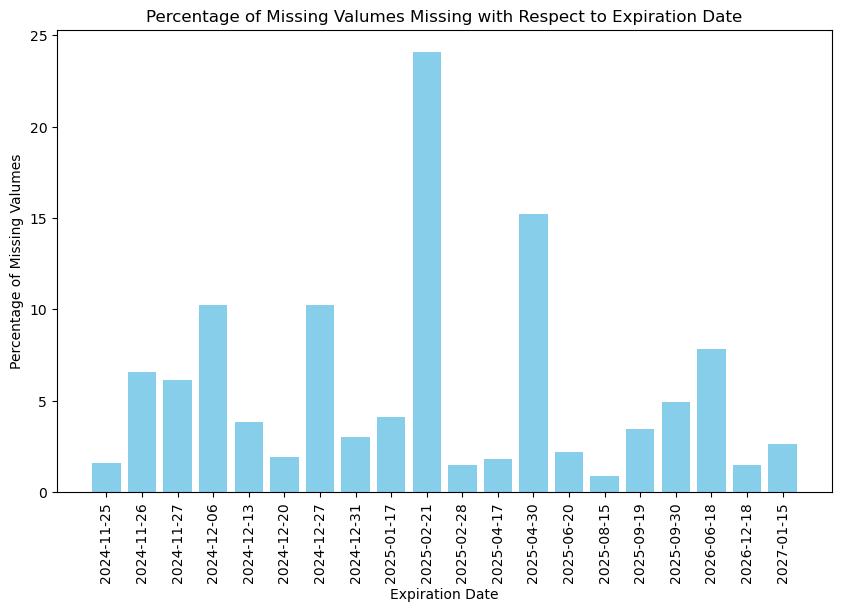

In [314]:
missing_values_by_exp = spy_options_calls[spy_options_calls['volume'].isnull()].groupby('expirationDateCalls').size()
missing_values_by_exp = missing_values_by_exp.reset_index()
missing_values_by_exp.columns = ['expirationDateCalls', 'missingVolume']

#Creating ex_spy DataFrame holding the number of rows in spy_options_calls  with the same expiration date
ex_spy = spy_options_calls.groupby('expirationDateCalls').size().reset_index()
ex_spy.columns = ['expirationDateCalls', 'total_counts']

# Merge the missing counts with total counts
merged_counts = pd.merge(missing_values_by_exp, ex_spy, on='expirationDateCalls')



plt.figure(figsize=(10, 6))
plt.bar(merged_counts['expirationDateCalls'], merged_counts['missingVolume']/merged_counts['total_counts'] * 100, color='skyblue')
plt.xlabel('Expiration Date')
plt.ylabel('Percentage of Missing Valumes')
plt.xticks(rotation=90)
plt.title('Percentage of Missing Valumes Missing with Respect to Expiration Date')
plt.show()



Since most columns have a small number of missing values, we will completely remove the volume column and drop the other rows containing missing values.

In [363]:
spy_options_calls.drop('volume', axis=1, errors='ignore', inplace = True)

spy_options_calls = spy_options_calls[~spy_options_calls['bid'].isnull()]
spy_options_calls = spy_options_calls[~spy_options_calls['openInterest'].isnull()]

spy_options_calls.isnull().sum()

/var/folders/ns/ldg2lqpn3gv6lxm55vph6x540000gn/T/ipykernel_1135/359959605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy_options_calls.drop('volume', axis=1, errors='ignore', inplace = True)


contractSymbol         0
lastTradeDate          0
strike                 0
lastPrice              0
bid                    0
ask                    0
change                 0
percentChange          0
openInterest           0
impliedVolatility      0
inTheMoney             0
contractSize           0
currency               0
expirationDateCalls    0
dtype: int64

## 6. Data Transformation

In [371]:
spy_options_calls['lastTradeDate'] = pd.to_datetime(spy_options_calls['lastTradeDate'])
spy_options_calls['expirationDateCalls'] = pd.to_datetime(spy_options_calls['expirationDateCalls'])

## 7. Handling outliers 

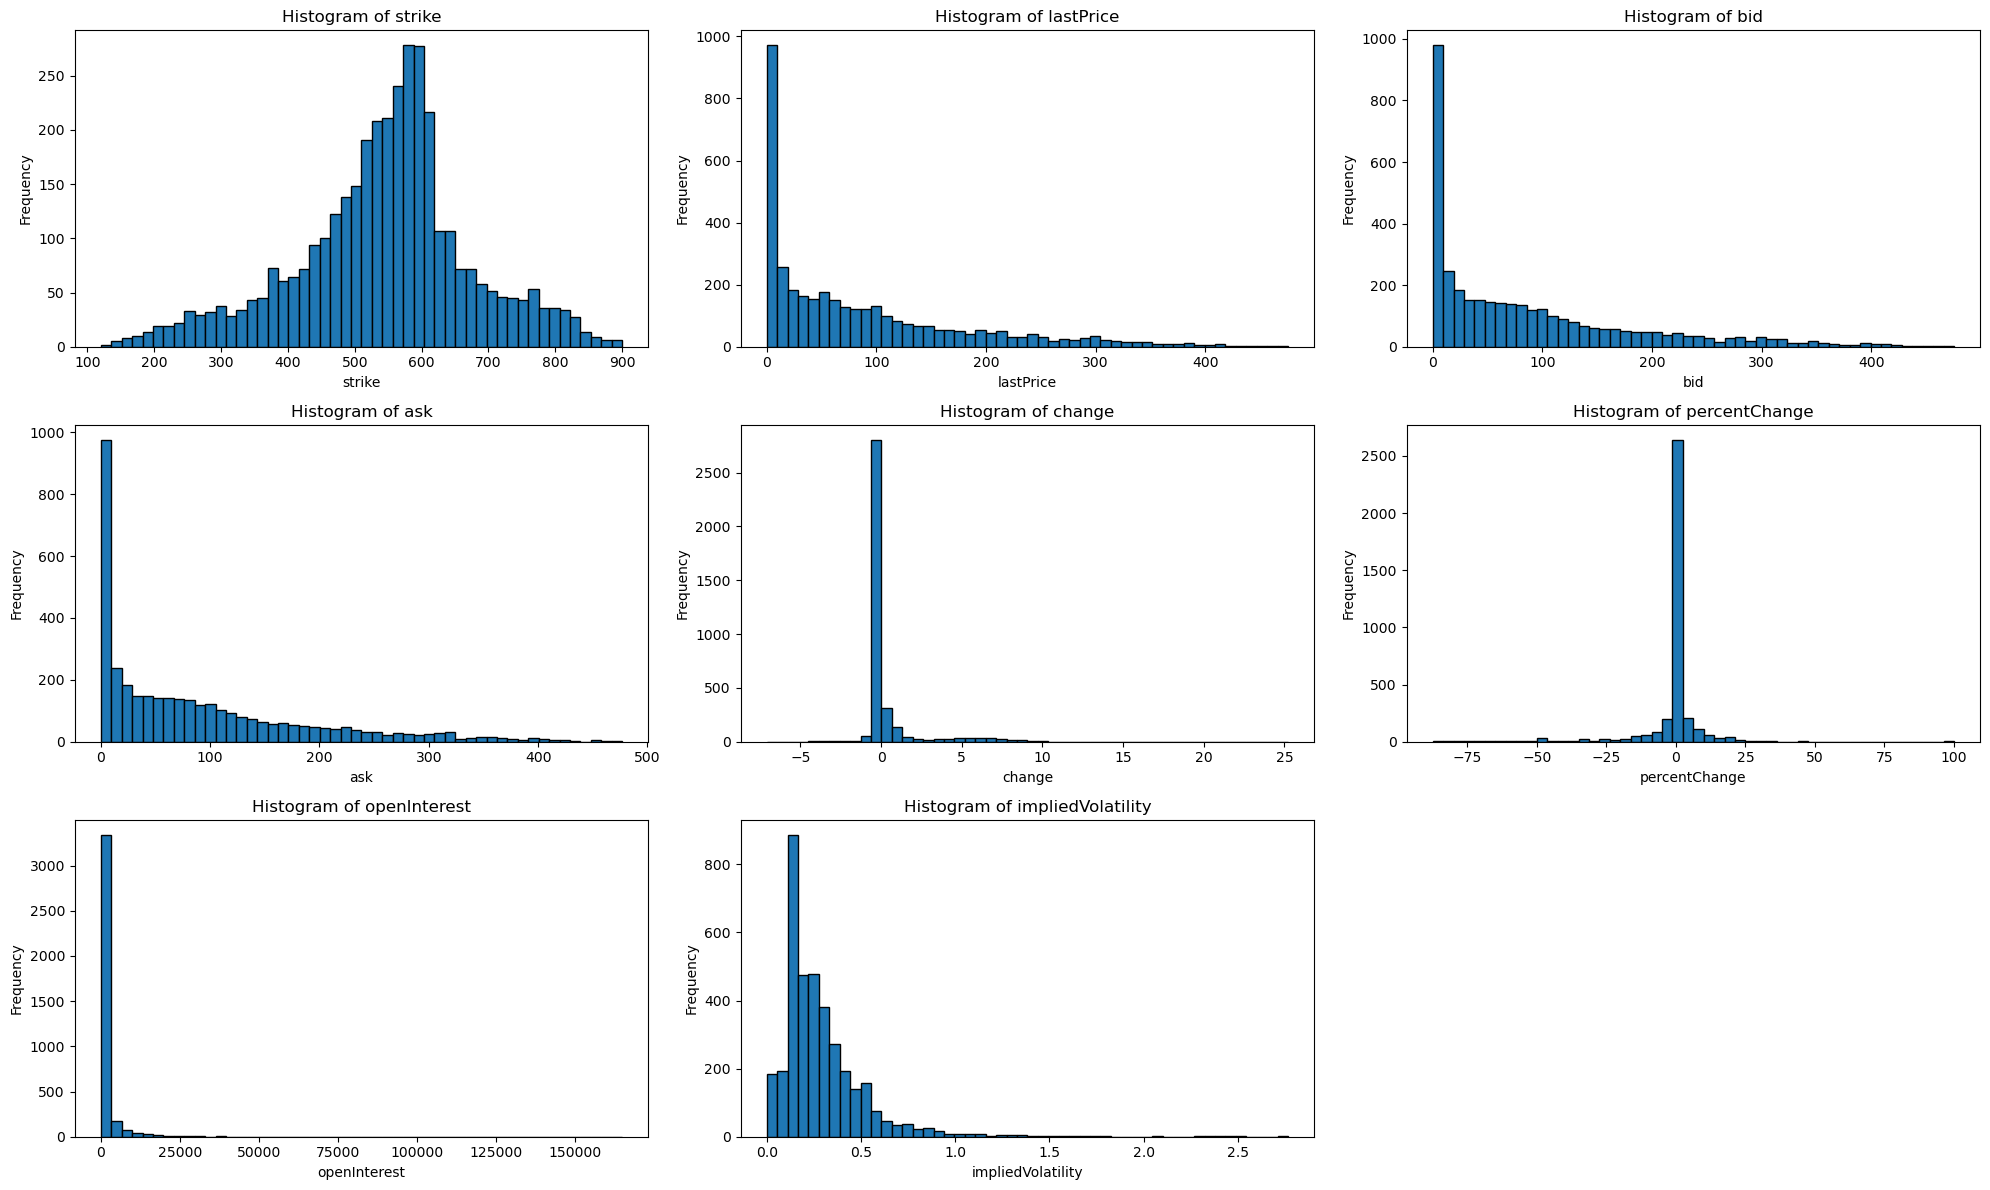

In [390]:
df = spy_options_calls

# Select only the numerical columns
numerical_columns = df.select_dtypes(include='number')

# Create a grid of subplots: rows and columns based on the number of numerical columns
num_cols = len(numerical_columns.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Adjust rows for grid
fig, axes = plt.subplots(rows, 3, figsize=(20, 4 * rows))

# Flatten axes to make iteration easier (in case there are multiple rows)
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns.columns):
    axes[i].hist(df[column], bins=50, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (if there are more grid cells than columns)
for i in range(num_cols, len(axes)):
    axes[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


From the plots it is clear that the only ones with useful information are `impliedVolatility` and `strike`. For example, as you see below more than 30 percent of the entries in `percentChange` are zero. 

In [443]:
spy_options_calls[spy_options_calls['percentChange']== 0].shape

(2169, 15)

In [452]:
spy_options_calls_cleaned = spy_options_calls[['contractSymbol', 'lastTradeDate', 'strike', 'inTheMoney','impliedVolatility', 'contractSize', 'currency', 'expirationDateCalls']]


spy_options_calls_cleaned.info()
spy_options_calls_cleaned.describe()
spy_options_calls_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   contractSymbol       3705 non-null   object 
 1   lastTradeDate        3705 non-null   object 
 2   strike               3705 non-null   float64
 3   inTheMoney           3705 non-null   bool   
 4   impliedVolatility    3705 non-null   float64
 5   contractSize         3705 non-null   object 
 6   currency             3705 non-null   object 
 7   expirationDateCalls  3705 non-null   object 
dtypes: bool(1), float64(2), object(5)
memory usage: 206.4+ KB


,contractSymbol,lastTradeDate,strike,inTheMoney,impliedVolatility,contractSize,currency,expirationDateCalls
0,SPY241125C00300000,2024-11-21 20:32:18+00:00,300.0,True,2.765628,REGULAR,USD,2024-11-25
1,SPY241125C00535000,2024-11-20 20:33:29+00:00,535.0,True,0.544926,REGULAR,USD,2024-11-25
2,SPY241125C00540000,2024-11-21 20:22:54+00:00,540.0,True,0.664554,REGULAR,USD,2024-11-25
3,SPY241125C00550000,2024-11-22 18:16:33+00:00,550.0,True,0.564457,REGULAR,USD,2024-11-25
4,SPY241125C00560000,2024-11-22 19:39:03+00:00,560.0,True,0.461675,REGULAR,USD,2024-11-25
